In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
a = sns.color_palette("Dark2")
a

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [3]:
green, orange, purple, fushia, lightgreen, yellow, brown, gray = sns.color_palette("Dark2")

In [4]:
# default for line plots
sns.set_theme()
sns.set_style('dark')
sns.set_context("paper", font_scale=2.7)

In [5]:
interim = xr.open_mfdataset('/archive/Raphael.Dussin/runs_forcings/OM4_05.ERAinterim/*ocean_scalar_annual.nc', decode_times=True)

In [6]:
blend = xr.open_mfdataset('/archive/Raphael.Dussin/runs_forcings/OM4_05.BlendPrecip/*ocean_scalar_annual.nc', decode_times=True)

In [7]:
blend_0net = xr.open_mfdataset('/archive/Raphael.Dussin/runs_forcings/OM4_05.Blend_precip_0netfw/*ocean_scalar_annual.nc', decode_times=True)

In [8]:
interim_0net = xr.open_mfdataset('/archive/Raphael.Dussin/runs_forcings/OM4_05.ERAinterim_0netfw/*ocean_scalar_annual.nc', decode_times=True)

In [9]:
GPCP = xr.open_mfdataset('/archive/Raphael.Dussin/runs_forcings/OM4_05.GPCP/*ocean_scalar_annual.nc', decode_times=True)

In [10]:
GPCP_0net = xr.open_mfdataset('/archive/Raphael.Dussin/runs_forcings/OM4_05.GPCP_0netfw/*ocean_scalar_annual.nc', decode_times=True)

In [11]:
results = xr.concat([interim, blend, blend_0net, interim_0net, GPCP, GPCP_0net], dim='experiment')

In [12]:
results

<xarray.Dataset>
Dimensions:              (experiment: 6, nv: 2, scalar_axis: 1, time: 40)
Coordinates:
  * scalar_axis          (scalar_axis) float64 0.0
  * time                 (time) object 1979-07-02 12:00:00 ... 2018-07-02 12:...
  * nv                   (nv) float64 1.0 2.0
Dimensions without coordinates: experiment
Data variables:
    masso                (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    volo                 (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    thetaoga             (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    tosga                (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    soga                 (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    sosga                (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ave_wfo              (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ave_evs              (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ave_hfsso            (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ave_rsntds           (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ave_rlntds           (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ave_hflso            (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ave_hfds             (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    net_heat_coupler_ga  (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    LwLatSens_ga         (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ssh_ga               (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    precip_ga            (experiment, time, scalar_axis) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    average_T1           (experiment, time) datetime64[ns] dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_T2           (experiment, time) datetime64[ns] dask.array<chunksize=(1, 1), meta=np.ndarray>
    average_DT           (experiment, time) timedelta64[ns] dask.array<chunksize=(1, 1), meta=np.ndarray>
    time_bnds            (experiment, time, nv) timedelta64[ns] dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
Attributes:
    filename:   19790101.ocean_scalar_annual.nc
    title:      OM4_025
    grid_type:  regular
    grid_tile:  N/A

In [13]:
results['experiment'] = xr.DataArray(['ERAi', 'CMT', 
                                      'CMT_0netfw', 'ERAi_0netfw', 
                                      'GPCP', 'GPCP_0netfw'], dims=('experiment'))

In [ ]:
#resERAi = xr.concat([interim, interim_0net], dim='experiment')
#resERAi['experiment'] = xr.DataArray(['ERAinterim', 'ERAinterim_0netfw'], dims=('experiment'))

#resBld = xr.concat([blend, blend_0net], dim='experiment')
#resBld['experiment'] = xr.DataArray(['BlendPrecip', 'BlendPrecip_0netfw'], dims=('experiment'))

#resGPCP = xr.concat([GPCP, GPCP_0net], dim='experiment')
#resGPCP['experiment'] = xr.DataArray(['GPCP', 'GPCP_0netfw'], dims=('experiment'))

In [ ]:
#fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[14,6])
#resERAi['volo'].squeeze(dim='scalar_axis').plot.line(ax=axs[0], x='time',marker='o', linestyle='--')
#resBld['volo'].squeeze(dim='scalar_axis').plot.line(ax=axs[1], x='time',marker='o', linestyle='--')
#resGPCP['volo'].squeeze(dim='scalar_axis').plot.line(ax=axs[2], x='time',marker='o', linestyle='--')

In [ ]:
#plt.figure(figsize=[10,8])
#results['volo'].squeeze(dim='scalar_axis').plot.line(x='time',marker='o', linestyle='--')

In [ ]:
#plt.figure(figsize=[10,8])
#results['precip_ga'].squeeze(dim='scalar_axis').plot.line(x='time',marker='o', linestyle='--')

In [ ]:
#fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[14,6])
#resERAi['precip_ga'].squeeze(dim='scalar_axis').plot.line(ax=axs[0], x='time',marker='o', linestyle='--')
#resBld['precip_ga'].squeeze(dim='scalar_axis').plot.line(ax=axs[1], x='time',marker='o', linestyle='--')
#resGPCP['precip_ga'].squeeze(dim='scalar_axis').plot.line(ax=axs[2], x='time',marker='o', linestyle='--')

In [ ]:
#plt.figure(figsize=[10,8])
#results['ave_evs'].squeeze(dim='scalar_axis').sel(experiment=['BlendPrecip', 'Blend_0netfw']).plot.line(x='time')

In [ ]:
#plt.figure(figsize=[10,8])
#results['ave_wfo'].squeeze(dim='scalar_axis').plot.line(x='time',marker='o', linestyle='--')

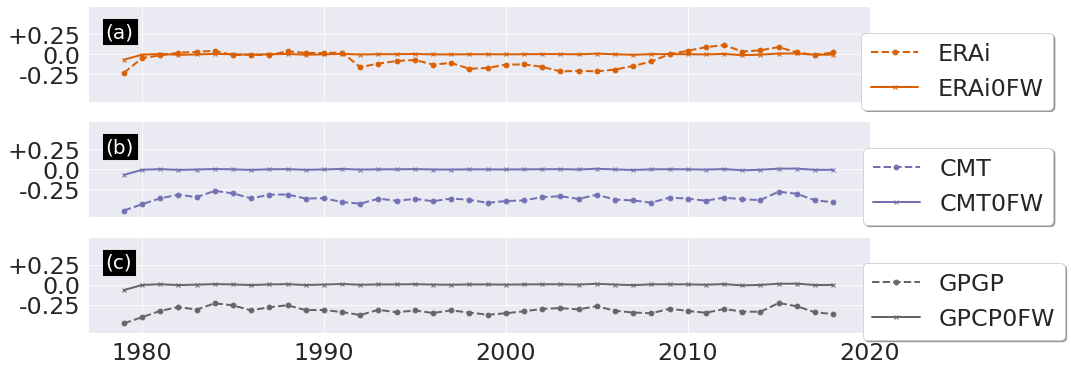

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[14,6])
#resERAi['ave_wfo'].squeeze(dim='scalar_axis').plot.line(ax=axs[0], x='time',marker='o', linestyle='--')
#resBld['ave_wfo'].squeeze(dim='scalar_axis').plot.line(ax=axs[1], x='time',marker='o', linestyle='--')
#resGPCP['ave_wfo'].squeeze(dim='scalar_axis').plot.line(ax=axs[2], x='time',marker='o', linestyle='--')

time = np.arange(1979, 2018+1)  # easier than datetime

axs[0].plot(time, results['ave_wfo'].sel(experiment='ERAi').values * 86400, color=orange, marker='o', linestyle='--', linewidth=2, label='ERAi')
axs[0].plot(time, results['ave_wfo'].sel(experiment='ERAi_0netfw').values * 86400, color=orange, marker='x', linestyle='-', linewidth=2, label='ERAi0FW')
axs[1].plot(time, results['ave_wfo'].sel(experiment='CMT').values * 86400, color=purple, marker='o', linestyle='--', linewidth=2, label='CMT')
axs[1].plot(time, results['ave_wfo'].sel(experiment='CMT_0netfw').values * 86400, color=purple, marker='x', linestyle='-', linewidth=2, label='CMT0FW')
axs[2].plot(time, results['ave_wfo'].sel(experiment='GPCP').values * 86400, color=gray, marker='o', linestyle='--', linewidth=2., label='GPGP')
axs[2].plot(time, results['ave_wfo'].sel(experiment='GPCP_0netfw').values * 86400, color=gray, marker='x', linestyle='-', linewidth=2, label='GPCP0FW')

axs[0].legend(loc=4, facecolor='w', shadow=True, ncol=1, bbox_to_anchor=(1.25,-0.2))
axs[1].legend(loc=4, facecolor='w', shadow=True, ncol=1, bbox_to_anchor=(1.25,-0.2))
axs[2].legend(loc=4, facecolor='w', shadow=True, ncol=1, bbox_to_anchor=(1.265,-0.2))

for k in range(3):
    axs[k].grid()
    axs[k].set_ylim([-0.6,0.6])
    axs[k].set_yticks([-0.25, 0., 0.25])
    axs[k].set_yticklabels(['-0.25', '0.0', '+0.25'])
    axs[k].set_xticks([1980,1990,2000,2010,2020])
    
for k in range(2):
    axs[k].set_xticklabels(['','','','',''])
#    axs[k].set_xlabel("")
#    axs[k].set_title("")
#    axs[k].set_ylabel("")
#    #axs[k].legend(visible=False)

axs[0].axes.text(1978,0.40,'(a)',
            verticalalignment='top',
            horizontalalignment='left',
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

axs[1].axes.text(1978,0.40,'(b)',
            verticalalignment='top',
            horizontalalignment='left',
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

axs[2].axes.text(1978,0.40,'(c)',
            verticalalignment='top',
            horizontalalignment='left',
            bbox={'facecolor': 'black'},
            color='white', fontsize=20)

plt.savefig('WFO_multi_correct.png', bbox_inches='tight')

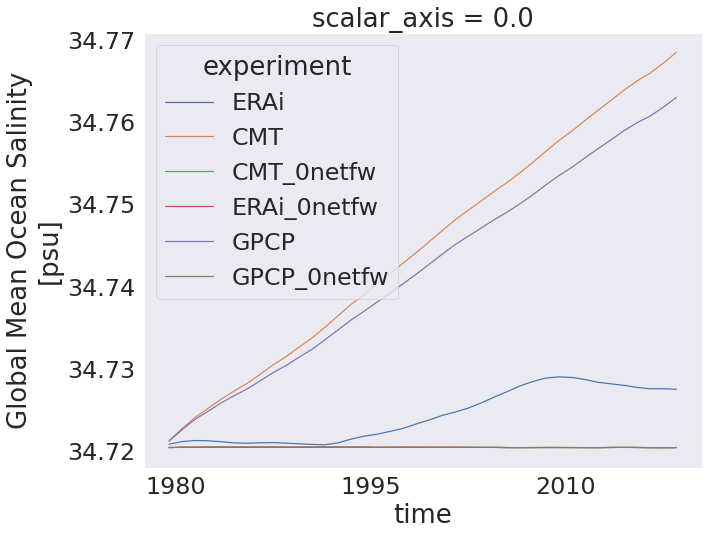

In [15]:
plt.figure(figsize=[10,8])
results['soga'].squeeze(dim='scalar_axis').plot.line(x='time')

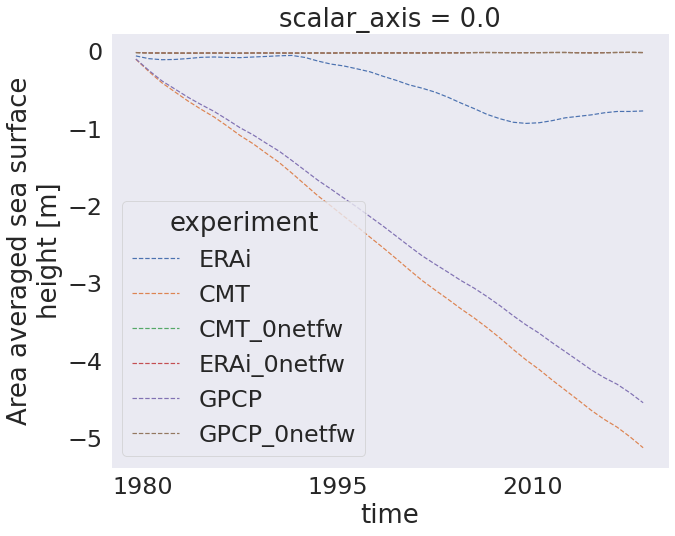

In [16]:
plt.figure(figsize=[10,8])
results['ssh_ga'].squeeze(dim='scalar_axis').plot.line(x='time', linestyle='--')

In [ ]:
# old stuff

In [ ]:
import typing as T
import itertools
from scipy.optimize import curve_fit
import numpy as np

def _linear(t, a, b):
    return a + b * t

FUNCS = {
    'linear': _linear,
}



def trend(
        data: xr.DataArray,
        dim: str = 'time',
        slope_units: str = None,
) -> T.List[xr.DataArray]:
    """Return intercept, slope and std-s of the input data trend over a specified dimension.

    Args:
        data (data object): Input data to find the trend of.
        dim (str, optional): Dimension over which the trend is calculated. Default is 'time'.
        slope_units (str, optional): Unit of the trend' slope. Default is None.

    Returns:
        list of data objects: List of data containing **source** intercept, slope and their std-s.

    Examples:
        Compute trend of input data over the 'time' dimension:

        >>> a, b, stddev_a, stddev_b = ct.stat.trend(data)

        You can also specify a dimension as follows:

        >>> a, b, stddev_a, stddev_b = ct.stat.trend(data, dim='lon')
    """
    if dim not in data.coords:
        raise ValueError("Coord %r not in source data." % dim)
    a = xr.zeros_like(data.mean(dim)).load()
    b = a.copy(deep=True).load()
    stddev_a = a.copy(deep=True).load()
    stddev_b = a.copy(deep=True).load()
    for prod in itertools.product(*[range(a[coord].size) for coord in a.dims]):
        params, covs, *_ = _fit(data.isel(**dict(zip(a.dims, prod))).drop(a.dims).compute())
        a[prod] = params[0]
        b[prod] = params[1]
        stddev = np.sqrt(np.diag(covs))
        stddev_a[prod] = stddev[0]
        stddev_b[prod] = stddev[1]
    if data.attrs.get('units'):
        a_units = data.attrs.get('units')
        a.attrs['units'] = a_units
        stddev_a.attrs['units'] = a_units
        coord_units = data[dim].attrs.get('units', '')
        if not coord_units:
            # Workaround for time coord without units attr, take it from 'datetime[*]'
            if 'datetime' in data[dim].dtype.name:
                coord_units = data[dim].dtype.name[:-1].split('[')[-1]
            else:
                coord_units = '1'
        #b_units = units.format_units('/'.join([a_units, coord_units]))
        #b.attrs['units'] = b_units
        #stddev_b.attrs['units'] = b_units
    #if slope_units:
        #b = units.convert_units(b, target_units=slope_units)
        #stddev_b = units.convert_units(stddev_b, target_units=slope_units)
    a.attrs['long_name'] = data.name + ' trend intercept'
    b.attrs['long_name'] = data.name + ' trend slope'
    stddev_a.attrs['long_name'] = data.name + ' trend intercept std'
    stddev_b.attrs['long_name'] = data.name + ' trend slope std'
    return [a.rename('a'), b.rename('b'), stddev_a.rename('a_std'), stddev_b.rename('b_std')]

def _fit(
        calib_vals: xr.DataArray,
        func: T.Union[T.Callable, str] = 'linear',
) -> T.List:
    calib_vals = calib_vals.squeeze()
    dims = {d: 0 for d, s in calib_vals.coords.items() if s.size == 1}
    dropped = calib_vals.drop(list(dims))
    if len(dropped.dims) == 1:
        dim, = dropped.dims
    else:
        raise ValueError("Source array has more than one coord.")
    if isinstance(func, str):
        if func in FUNCS:
            func = FUNCS.get(func)
        else:
            raise ValueError("Unsupported func type %r", func)
    params, covs = curve_fit(func, calib_vals[dim].values.astype(float), dropped)

    return [params, covs, func, dim]

In [ ]:
trend?

In [ ]:
trend_ssh = trend(results['ssh_ga'].sel(experiment='BlendPrecip'))

In [ ]:
trend_ssh

In [ ]:
# drift in m/day is -0.00038797
14594.5 * -0.00038797

In [ ]:
# which means our imbalance in mm/day is
imb = -0.00038797 * 1000
imb

In [ ]:
# our mean precip in mm/day
mean = blend['precip_ga'].mean(dim='time').values * 86400
mean

In [ ]:
factor = (mean - imb) / mean
factor

In [ ]:
plt.figure(figsize=[10,8])
results['tosga'].squeeze(dim='scalar_axis').plot.line(x='time', marker='o')

In [ ]:
results

In [ ]:
plt.figure(figsize=[10,8])
results['ave_wfo'].sel(experiment='ERAinterim').squeeze(dim='scalar_axis').plot.line(x='time')

In [ ]:
plt.figure(figsize=[10,8])
results['ave_wfo'].sel(experiment='ERAinterim').squeeze(dim='scalar_axis').plot.line(x='time')

In [ ]:
plt.figure(figsize=[10,8])
results['ave_wfo'].sel(experiment='BlendRescaled').squeeze(dim='scalar_axis').plot.line(x='time')

In [ ]:
results['ave_wfo'].sel(experiment='BlendRescaled').squeeze(dim='scalar_axis').mean().values

In [ ]:
results['ave_wfo'].sel(experiment='ERAinterim').squeeze(dim='scalar_axis').mean().values

In [ ]:
results['ave_wfo'].sel(experiment='BlendPrecip').squeeze(dim='scalar_axis').mean().values

In [ ]:
plt.figure(figsize=[10,8])
results['precip_ga'].sel(experiment='BlendPrecip').squeeze(dim='scalar_axis').plot.line(x='time', linestyle='--', marker='o')

In [ ]:
plt.figure(figsize=[10,8])
results['precip_ga'].sel(experiment='BlendRescaled').squeeze(dim='scalar_axis').plot.line(x='time', linestyle='--', marker='o')